Chaper 14
=======

In [2]:
import tensorflow as tf
import numpy as np

In [7]:
g = tf.Graph()
with g.as_default():
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])
    
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)
    
    s1 = tf.shape(t1)
    s2 = tf.shape(t2)
    s3 = tf.shape(t3)
    print('Shapes: {}, {}, {}'.format(s1, s2, s3))

Shapes: Tensor("Shape:0", shape=(0,), dtype=int32), Tensor("Shape_1:0", shape=(1,), dtype=int32), Tensor("Shape_2:0", shape=(2,), dtype=int32)


In [8]:
with tf.Session(graph=g) as sess:
    print('Ranks:', r1.eval(), r2.eval(), r3.eval())

Ranks: 0 1 2


In [9]:
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2)
    c = tf.constant(3, name='c')
    z = 2 * (a - b) + c

In [13]:
with tf.Session(graph=g) as sess:
    print(sess.run(z))

1


In [20]:
g = tf.Graph()
with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[], name='tf_a')
    tf_b = tf.placeholder(tf.int32, shape=[], name='tf_b')
    tf_c = tf.placeholder(tf.int32, shape=[], name='tf_c')
    r1 = tf_a - tf_b
    r2 = 2 * r1
    z = r2 + tf_c
    
with tf.Session(graph=g) as sess:
    feed_dict = {tf_a: 5, tf_b: 5, tf_c: 3}
    print(sess.run(z, feed_dict=feed_dict))

3


In [29]:
g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(tf.float32, shape=[None, 2], name='tf_x')
    x_mean = tf.reduce_mean(tf_x, axis=0, name='mean')
    
with tf.Session(graph=g) as sess:
    feed_dict = {tf_x: [[1, 1], [1, 0], [100, 100], [-10, -2]]}
    print(sess.run(x_mean, feed_dict=feed_dict)) 

[23.   24.75]


In [51]:
g = tf.Graph()
data = [[1, 2, 3, 4], [5, 6, 5, 6]]
with g.as_default():
    #w = tf.Variable(np.array(data))
    w = tf.get_variable(name='w', shape=[2, 2])
    init_op = tf.global_variables_initializer()

with tf.Session(graph=g) as sess:
    sess.run(init_op)
    print(sess.run(w))

[[-0.67490554  0.8646954 ]
 [ 0.12993968 -0.43093848]]


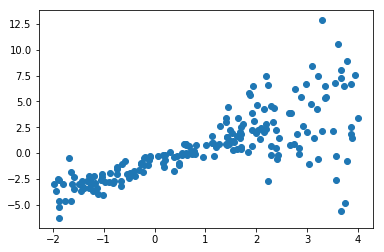

In [27]:
import matplotlib.pyplot as plt
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t / 3), size=None)
        y.append(r)
    return x, 1.726 * x - 0.84 + np.array(y)

x, y = make_random_data()
plt.scatter(x, y)

In [5]:
g = tf.Graph()
with g.as_default():
    tf.set_random_seed(123)
    tf_x = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
    tf_y = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_y')
    weight = tf.Variable(tf.random_normal(shape=(1,1), stddev=0.25), name='weight')
    bias = tf.Variable(0.0, name='bias')
    y_hat = tf.add(weight * tf_x, bias, name='y_hat')
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost')
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')
    saver = tf.train.Saver()
    
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]
n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(n_epochs):
        c, _, w, b = sess.run([cost, train_op, weight, bias], feed_dict={tf_x: x_train, tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch {}: {:0.2}, {}, {}'.format(e, c, w, b))
    saver.save(sess, './trained-model')

Epoch 0: 1.2e+01, [[-0.23591281]], 0.0009113834821619093
Epoch 50: 8.4, [[0.19617605]], 0.025164252147078514
Epoch 100: 6.6, [[0.4939696]], 0.018348781391978264
Epoch 150: 5.7, [[0.70077723]], -0.007704910356551409
Epoch 200: 5.2, [[0.84582096]], -0.04514914005994797
Epoch 250: 5.0, [[0.9488256]], -0.08881086856126785
Epoch 300: 4.8, [[1.0231143]], -0.13531088829040527
Epoch 350: 4.7, [[1.0776942]], -0.18247121572494507
Epoch 400: 4.6, [[1.1186615]], -0.22891581058502197
Epoch 450: 4.6, [[1.1501482]], -0.27380281686782837


In [6]:
import tensorflow as tf
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0': x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


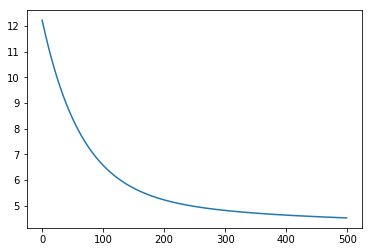

In [7]:
plt.plot(training_costs)

In [19]:
g = tf.Graph()
with g.as_default():
    arr = np.array([[1., 2., 3., 3.5], [4., 5., 6., 6.5], [7.,8.,9.,9.5]])
    T1 = tf.constant(arr, name='T1')
    print(T1)
    s = T1.shape
    print('Shape of T1 is {}'.format(s))
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0],)))
    print(T3)
    T4 = tf.reshape(T1, shape=[1, 1, -1], name='T4')
    print(T4)
    T5 = tf.reshape(T1, shape=[1, 3,4])
    print(T5)
    
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>
Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("Reshape:0", shape=(1, 3, 4), dtype=float64)
[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [22]:
def build_classifier(data, labels, n_classes=2):
    data_shape = data.shape.as_list()
    weights = tf.get_variable(name='weights', shape=(data_shape[1], n_classes), dtype=tf.float32)
    bias = tf.get_variable(name='bias', initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name='logits')
    return logits, tf.nn.softmax(logits)

In [25]:
def build_generator(data, n_hidden):
    data_shape = data.shape.as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, name='hidden_pre_activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name='w2')
    output = tf.add(tf.matmul(hidden, w2), b2, name='output')
    return output, tf.nn.sigmoid(output)

In [26]:
batch_size = 64
g = tf.Graph()
with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name='tf_X')
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    with tf.variable_scope('classifier') as scope:
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter(logdir='./logs/', graph=g)